SciPy curve_fit

Status:  True
Message: Both actual and predicted relative reductions in the sum of squares are at most 0.000000 and the relative error between two consecutive iterates is at most 0.000000

Fitted parameters:
a   =   9.86960440
b   =  -4.01047621
c   =   9.86327195
d   =   0.98120671

Sum squared diffs: 0.003446

Difference extremes:
Max =   0.00210423
Min =  -0.00086865


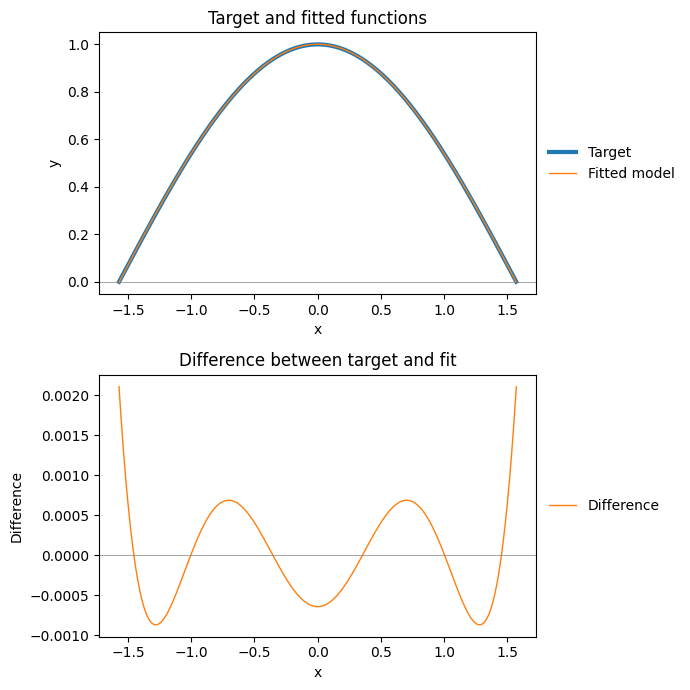

In [1]:
# Model 1
# Attempt to replicate https://www.johndcook.com/blog/2024/09/03/optimal-rational-approximation
# Works with parameters: b, c, d while A is constant.
# Use curve fitting function.


import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(result_x, x_data, y_data, difference):
    plt.figure(figsize=(7, 7))
    colors = sns.color_palette('tab10', len(result_x)+1)

    plt.subplot(2, 1, 1)
    plt.plot(x_data, y_data, label='Target', color=colors[0], linewidth=3)
    plt.plot(x_data, model(x_data, *result_x), label='Fitted model', color=colors[1], linewidth=1)
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.title('Target and fitted functions')
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.subplot(2, 1, 2)
    plt.plot(x_data, difference, label='Difference', color=colors[1], linewidth=1)
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.title('Difference between target and fit')
    plt.xlabel('x')
    plt.ylabel('Difference')
    
    plt.tight_layout()
    plt.show()

def print_results(result, x_data, y_data, mesg, ier, difference):
    print(f'Status:  {ier in {1, 2, 3, 4}}')
    print(f'Message: {" ".join(mesg.split())}')   # Remove new lines and stray spaces when printing the message
    b, c, d = result
    print(f'\nFitted parameters:\na   = {A:>12,.8f}\nb   = {b:>12,.8f}\nc   = {c:>12,.8f}\nd   = {d:>12,.8f}')
    print(f'\nSum squared diffs: {np.sum((y_data - model(x_data, b, c, d))**2):,.6f}')
    print('\nDifference extremes:')
    print(f'Max = {max(difference):>12,.8f}\nMin = {min(difference):>12,.8f}')
    
def model(x, b, c, d):
    return (A + b * x**2) / (c + d * x**2)

def target_function(x):
    return np.cos(x)

def main():
    print('SciPy curve_fit')
    print('===============\n')
    x_data = np.linspace(-np.pi/2, np.pi/2, NUMPOINTS)
    y_data = target_function(x_data)
    guess = [1, 1, 1]
    result, pcov, infodict, mesg, ier = curve_fit(model, x_data, y_data, p0=guess, full_output=True)
    difference = y_data - model(x_data, *result)
    print_results(result, x_data, y_data, mesg, ier, difference)
    plot_results(result, x_data, y_data, difference)

NUMPOINTS = 10000
A = np.pi**2

if __name__ == "__main__":
    main()